In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Random Samples ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination, and how long they were delayed in minutes.

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(0, united.num_rows))
united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


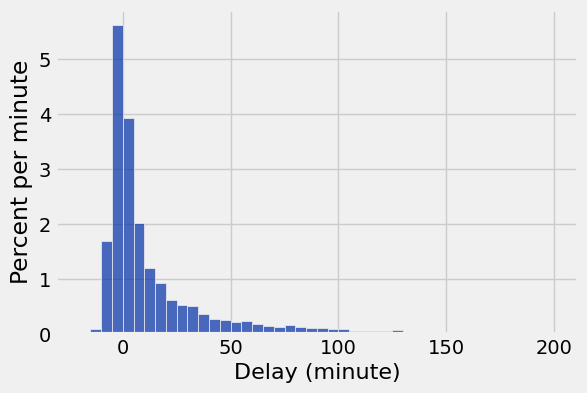

In [3]:
# Probability Distribution (assuming this is the entire population)
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins, unit = 'minute')

In [19]:
united.sample(10)

Date,Flight Number,Destination,Delay,Row
8/13/15,73,HNL,4,11052
7/12/15,1957,MCO,-3,6240
7/5/15,1255,SAN,-6,5113
7/4/15,1581,OGG,2,4997
6/24/15,1939,IAD,1,3601
8/12/15,205,PDX,-6,10891
8/24/15,1957,MCO,2,12812
8/30/15,1727,IND,18,13652
7/23/15,1122,HNL,4,7869
8/13/15,1092,LAS,-5,11120


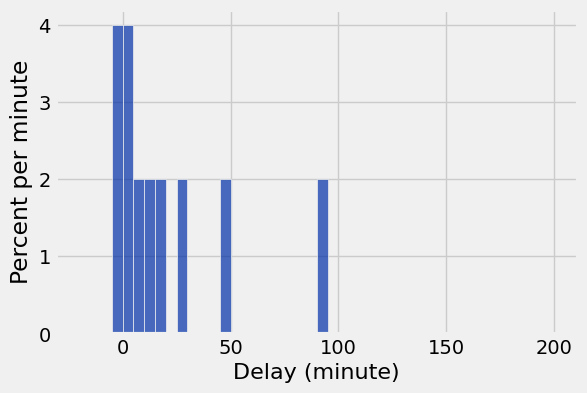

In [4]:
# Empirical Distribution of 10 flights
united.sample(10).hist('Delay', bins = united_bins, unit = 'minute')

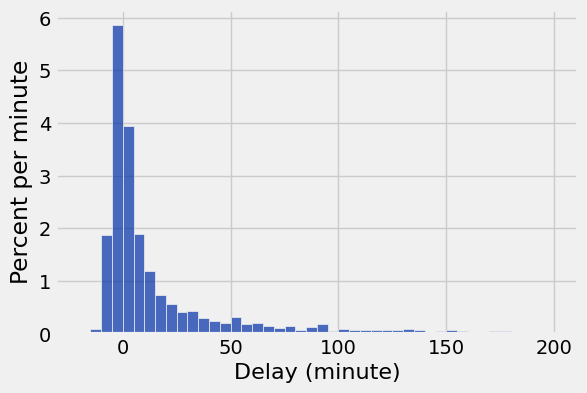

In [5]:
# Empirical Distribution of 1,000 flights
united.sample(1000).hist('Delay', bins = united_bins, unit = 'minute')

## Simulating Statistics ##

In [6]:
# (Population) Parameter
delays_arr = united.column('Delay')
np.median(delays_arr)

2.0

In [7]:
# (Sample) Statistic
united_sample = united.sample(10)
delays_sample_arr = united_sample.column('Delay')
np.median(delays_sample_arr)

-4.0

## Empirical Distribution of a Statistic ##

In [26]:
# Write a function that takes a samples "size" rows from the table and returns the median
def sample_median(size):
    united_sample = united.sample(size)
    delays_sample_arr = united_sample.column('Delay')
    return np.median(delays_sample_arr)

In [32]:
# Call the function with a sample size = 10
sample_median(10)

4.0

In [35]:
# Call the function 1,000 times with a sample size = 10 & store the results in an array using append
sample_medians = make_array()
for i in np.arange(1000):
    simulated_median=sample_median(10)
    sample_medians=np.append(sample_medians,simulated_median)
sample_medians

array([ 12.5,   3.5,   2.5,   1.5,   4.5,   9.5,   0. ,  -1.5,   1.5,
        11.5,  -1. ,   5. ,   1.5,   6.5,   0.5,  34.5,   3. ,  13. ,
         5.5,  -1.5,  -1.5,   0. ,   2. ,  -0.5,   6. ,  -1. ,   4. ,
         6.5,  -2. ,  12.5,   0. ,   6.5,   2.5,   3.5,   1.5,   7. ,
        10.5,  -0.5,   8.5,  -1. ,   0. ,  -1. ,  -1.5,   0.5,  10. ,
         3.5,   2.5,   6.5,  16. ,  13. ,  -0.5,   6.5,   3. ,  -0.5,
        -1.5,   3.5,   4. ,  44. ,   7.5,   0. ,  -1. ,   8.5,   0. ,
         0.5,   9. ,  -0.5,   0. ,   4. ,  -1. ,   2. ,   4. ,  -2. ,
         5. ,  12.5,   8. ,   6. ,   0. ,  -0.5,   3.5,   1. ,   6. ,
         1.5,   2.5,   4. ,   2.5,  15.5,  24. ,  -1.5,   0. ,   3.5,
         0.5,   0. ,   2.5,   3. ,   5.5,   1.5,   1. ,   1. ,   1. ,
         3.5,   3.5,   7. ,   1.5,  -1.5,  -3. ,  -0.5,   9.5,   4.5,
        -0.5,   4.5,   2. ,   7.5,   0. ,  -1. ,  20.5,   5. ,  -0.5,
         0. ,   0.5,   2. ,  -1. ,  15.5,   6.5,   3. ,   6.5,   3.5,
         3.5,   5. ,

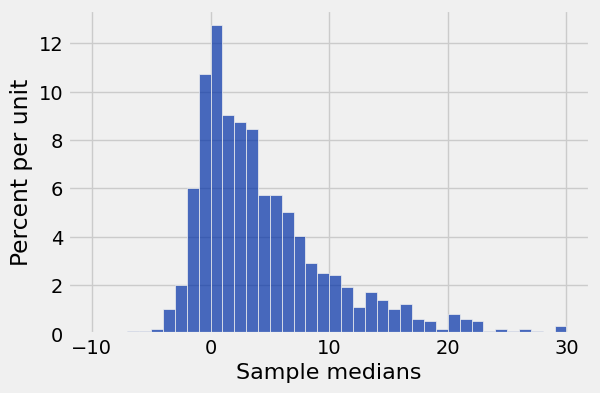

In [36]:
# Show the empirical distribution of sample size = 10
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

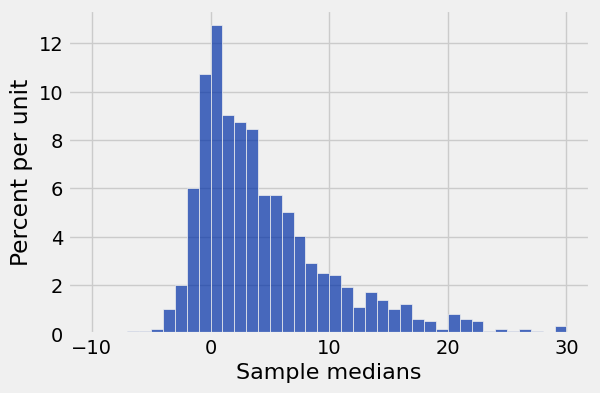

In [37]:
# Show the empirical distribution of sample size = 1,000
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

## Sampling from categorical distributions with `sample_proportions` ##

According to the CDC, about 10% of Americans 18 and over suffer from a depressive illness in any given year. [[source](https://www.cdc.gov/workplacehealthpromotion/health-strategies/depression/index.html)]

In [38]:
# Probability distribution
distribution_in_pop = make_array(0.9, 0.1)
distribution_in_pop

array([ 0.9,  0.1])

Suppose you have a group of 100 people. Let's simulate how many might suffer from a depressive illness, assuming we can treat each person as if they were drawn randomly from the population of US adults (a dubious assumption).

In [14]:
# Empirical distribution size 100
distribution_in_sample = sample_proportions(100, distribution_in_pop)
distribution_in_sample

array([ 0.94,  0.06])

In [15]:
distribution_in_sample = sample_proportions(100000, distribution_in_pop)
distribution_in_sample

array([ 0.90118,  0.09882])

# Practice

A box contains 3 white balls, 4 black balls, and 1 green ball. You reach in and draw a ball three separate times, replacing the ball you drew before each draw (so the sample_proportions are the same for each draw). Call this procedure of drawing three balls one experiment.

Write a function that simulates this experiment and returns the statistic "number of green balls drawn".

In [56]:
def num_green():
    #prob distribution of green ball, probability of not gree ball
    ball_prob_dist=make_array(1/8,7/8)
    ball_sample_dist=sample_proportions(3,ball_prob_dist)
    number_green=ball_sample_dist.item(0)*3
    return number_green
num_green()

1.0

Use the num_green function to simulate the experiment 10,000 times to visualize the distribution of the "number of green balls drawn" statistic.

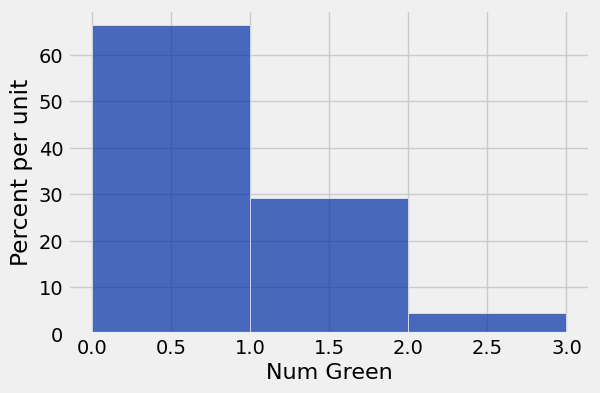

In [63]:
green_dist = make_array()

for i in np.arange(10000):
    result=num_green()
    green_dist=np.append(green_dist,result)

results_tbl = Table().with_column('Num Green', green_dist).hist(bins = 3)